In [1]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("data/AID_883_datatable_all.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10325 entries, 0 to 10324
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PUBCHEM_RESULT_TAG             10325 non-null  object 
 1   PUBCHEM_SID                    10320 non-null  float64
 2   PUBCHEM_CID                    10296 non-null  float64
 3   PUBCHEM_EXT_DATASOURCE_SMILES  10296 non-null  object 
 4   PUBCHEM_ACTIVITY_OUTCOME       10320 non-null  object 
 5   PUBCHEM_ACTIVITY_SCORE         10320 non-null  float64
 6   PUBCHEM_ACTIVITY_URL           0 non-null      float64
 7   PUBCHEM_ASSAYDATA_COMMENT      0 non-null      float64
 8   Phenotype                      10322 non-null  object 
 9   Potency                        3086 non-null   object 
 10  Efficacy                       3085 non-null   object 
 11  Analysis Comment               2 non-null      object 
 12  Curve_Description              3126 non-null  

In [3]:
df=df.dropna(subset=["PUBCHEM_EXT_DATASOURCE_SMILES","PUBCHEM_ACTIVITY_SCORE"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10296 entries, 5 to 10324
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PUBCHEM_RESULT_TAG             10296 non-null  object 
 1   PUBCHEM_SID                    10296 non-null  float64
 2   PUBCHEM_CID                    10296 non-null  float64
 3   PUBCHEM_EXT_DATASOURCE_SMILES  10296 non-null  object 
 4   PUBCHEM_ACTIVITY_OUTCOME       10296 non-null  object 
 5   PUBCHEM_ACTIVITY_SCORE         10296 non-null  float64
 6   PUBCHEM_ACTIVITY_URL           0 non-null      float64
 7   PUBCHEM_ASSAYDATA_COMMENT      0 non-null      float64
 8   Phenotype                      10296 non-null  object 
 9   Potency                        3068 non-null   object 
 10  Efficacy                       3068 non-null   object 
 11  Analysis Comment               0 non-null      object 
 12  Curve_Description              3110 non-null  

In [4]:
df= df.dropna(subset=["PUBCHEM_EXT_DATASOURCE_SMILES"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10296 entries, 5 to 10324
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PUBCHEM_RESULT_TAG             10296 non-null  object 
 1   PUBCHEM_SID                    10296 non-null  float64
 2   PUBCHEM_CID                    10296 non-null  float64
 3   PUBCHEM_EXT_DATASOURCE_SMILES  10296 non-null  object 
 4   PUBCHEM_ACTIVITY_OUTCOME       10296 non-null  object 
 5   PUBCHEM_ACTIVITY_SCORE         10296 non-null  float64
 6   PUBCHEM_ACTIVITY_URL           0 non-null      float64
 7   PUBCHEM_ASSAYDATA_COMMENT      0 non-null      float64
 8   Phenotype                      10296 non-null  object 
 9   Potency                        3068 non-null   object 
 10  Efficacy                       3068 non-null   object 
 11  Analysis Comment               0 non-null      object 
 12  Curve_Description              3110 non-null  

In [5]:
df.drop_duplicates(subset=['PUBCHEM_EXT_DATASOURCE_SMILES'], keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10296 entries, 5 to 10324
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PUBCHEM_RESULT_TAG             10296 non-null  object 
 1   PUBCHEM_SID                    10296 non-null  float64
 2   PUBCHEM_CID                    10296 non-null  float64
 3   PUBCHEM_EXT_DATASOURCE_SMILES  10296 non-null  object 
 4   PUBCHEM_ACTIVITY_OUTCOME       10296 non-null  object 
 5   PUBCHEM_ACTIVITY_SCORE         10296 non-null  float64
 6   PUBCHEM_ACTIVITY_URL           0 non-null      float64
 7   PUBCHEM_ASSAYDATA_COMMENT      0 non-null      float64
 8   Phenotype                      10296 non-null  object 
 9   Potency                        3068 non-null   object 
 10  Efficacy                       3068 non-null   object 
 11  Analysis Comment               0 non-null      object 
 12  Curve_Description              3110 non-null  

In [6]:
from mhfp.encoder import MHFPEncoder

In [7]:
mhfp_encoder_2048 = MHFPEncoder(2048)

In [8]:
fps_2048 = df['PUBCHEM_EXT_DATASOURCE_SMILES'].apply(mhfp_encoder_2048.encode) 

In [9]:
X = pd.DataFrame(np.array(fps_2048.to_list()))

In [10]:
def binary_score(score) :
    if score >0 :
        return 1
    return 0 

In [11]:
df["binary activity"]=df["PUBCHEM_ACTIVITY_SCORE"].map(binary_score)

In [12]:
y=df.iloc[: , -1]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)
X.shape,y_train.shape

((10296, 2048), (8236,))

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler =StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

X_train_scaled.shape

(8236, 2048)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
forest_model = RandomForestClassifier(max_depth=15)
forest_model.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=15)

In [21]:
from sklearn.svm import SVC

In [22]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

SVC()

In [23]:
# The maximum number of iterations for each model is set to 100 to ensure that the models are fully trained.
# The models are then evaluated using 5-fold cross-validation, and the resulting scores are stored in a list.
# Finally, the model with the highest mean cross-validation score is selected and printed 
# references : Titanic_TF_version.ipynb 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
#list of models to evaluate
models = [svm_model, forest_model, log_reg]

# Set the maximum number of iterations for each model
max_iter = 100
svm_model.set_params(C=max_iter)# Set the C parameter for the SVM model
forest_model.set_params(n_estimators=max_iter)
log_reg.set_params(max_iter=max_iter)

scores = []

# Iterate over the models and compute the cross-validation scores
for model in models:
  model_scores =  cross_val_score(model,X_train, y_train, cv=cv)
  scores.append(model_scores)
  print(f"Scores for {model}: {model_scores}")
# Checks if the scores list is empty and selects the model with the highest mean score if it is not. This is done to avoid an IndexError that would occur if the list is empty and we try to access its elements
if not scores:
  print("Error: The scores list is empty.")
else:
  # Select the model with the highest mean score
  best_model = models[np.argmax([np.mean(score) for score in scores])] # Find the index of the model with the highest mean score
  print(f"The best model is {best_model}.")

Scores for SVC(C=100): [0.77063107 0.77305825 0.78580097 0.76031553 0.77669903]
Scores for RandomForestClassifier(max_depth=15): [0.79126214 0.80825243 0.81128641 0.79854369 0.80885922]


C:\Users\Electro-Market.ma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Electro-Market.ma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Scores for LogisticRegression(): [0.7038835  0.72936893 0.73847087 0.73240291 0.7190534 ]
The best model is RandomForestClassifier(max_depth=15).


C:\Users\Electro-Market.ma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
forest_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [26]:
from sklearn.model_selection import GridSearchCV
parameters = {
     "max_depth": [10, 20, 30, 40],
}
selected_forest_model = GridSearchCV(forest_model,param_grid=parameters)
selected_forest_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=15),
             param_grid={'max_depth': [10, 20, 30, 40]})

In [27]:
selected_forest_model.best_params_

{'max_depth': 30}

In [28]:
optimized_forest_model = forest_model.set_params(max_depth=30)

In [29]:
optimized_forest_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=30)

In [30]:
import tensorflow as tf

In [31]:
optimized_forest_model = tf.keras.Sequential([
    tf.keras.layers.Dense(36, activation='relu',input_shape=(2048,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [32]:
optimized_forest_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
history = optimized_forest_model.fit(X_train,y_train,batch_size=64,epochs=10,validation_split=0.1)

Epoch 1/10
116/116 [==============================] - 13s 13ms/step - loss: 3707291.2500 - accuracy: 0.6635 - val_loss: 1130906.0000 - val_accuracy: 0.6590
Epoch 2/10
116/116 [==============================] - 1s 7ms/step - loss: 835029.3125 - accuracy: 0.6893 - val_loss: 466454.5312 - val_accuracy: 0.6311
Epoch 3/10
116/116 [==============================] - 1s 6ms/step - loss: 199764.8281 - accuracy: 0.6882 - val_loss: 342135.3750 - val_accuracy: 0.2852
Epoch 4/10
116/116 [==============================] - 1s 6ms/step - loss: 166135.1875 - accuracy: 0.6685 - val_loss: 71446.3906 - val_accuracy: 0.7536
Epoch 5/10
116/116 [==============================] - 1s 5ms/step - loss: 134063.2188 - accuracy: 0.6623 - val_loss: 125132.0078 - val_accuracy: 0.7500
Epoch 6/10
116/116 [==============================] - 1s 7ms/step - loss: 60803.0625 - accuracy: 0.6680 - val_loss: 27494.9883 - val_accuracy: 0.7051
Epoch 7/10
116/116 [==============================] - 1s 6ms/step - loss: 61689.0430 - 

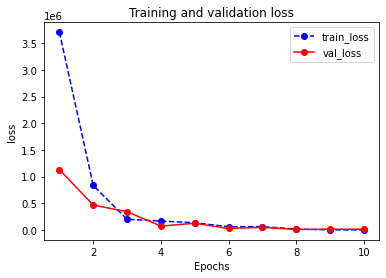

In [34]:
import matplotlib.pyplot as plt

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
    
plot_metric(history,"loss")

In [35]:
optimized_forest_model = tf.keras.Sequential([
    tf.keras.layers.Dense( 16, activation='relu',input_shape=(2048,)),
     tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [36]:
optimized_forest_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [37]:
history = optimized_forest_model.fit(X_train,y_train,batch_size=64,epochs=10,validation_split=0.1)

Epoch 1/10
116/116 [==============================] - 3s 9ms/step - loss: 2047106.8750 - accuracy: 0.6666 - val_loss: 1087380.0000 - val_accuracy: 0.6614
Epoch 2/10
116/116 [==============================] - 1s 5ms/step - loss: 904576.3750 - accuracy: 0.7103 - val_loss: 626987.2500 - val_accuracy: 0.6954
Epoch 3/10
116/116 [==============================] - 1s 5ms/step - loss: 505498.3750 - accuracy: 0.7308 - val_loss: 504748.5312 - val_accuracy: 0.6274
Epoch 4/10
116/116 [==============================] - 1s 5ms/step - loss: 305964.1875 - accuracy: 0.7524 - val_loss: 303634.0000 - val_accuracy: 0.6917
Epoch 5/10
116/116 [==============================] - 1s 5ms/step - loss: 232687.1406 - accuracy: 0.7563 - val_loss: 205684.4219 - val_accuracy: 0.7087
Epoch 6/10
116/116 [==============================] - 1s 5ms/step - loss: 89730.5625 - accuracy: 0.6882 - val_loss: 67256.2031 - val_accuracy: 0.7500
Epoch 7/10
116/116 [==============================] - 1s 5ms/step - loss: 14002.4580 - a

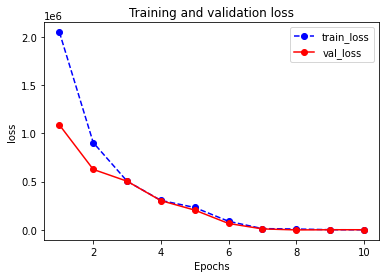

In [38]:
plot_metric(history,"loss")